In [0]:
# import lib

import pandas as pd
from lifetimes.datasets import load_dataset
from pyspark.sql import SparkSession
import numpy as np
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.utils import calibration_and_holdout_data
from datetime import datetime, timedelta
from lifetimes import BetaGeoFitter

In [0]:
# Preprocessing 
spark=SparkSession.builder.getOrCreate()
raw_df=spark.read.csv('/mnt/datalake/raw/dtc/input data for ml projects/Imported Raw Input/NG-NBD input data 2023-06-15.csv',header=True)
raw_df=raw_df.toPandas()
raw_df = raw_df.replace('NULL', np.nan)
dropna_raw_df=raw_df.dropna(axis=0).reset_index(drop=True)
dropna_raw_df.head(5)


,CompanyId,OrderNumTwo,PlacedDttm,PlacedUnits,PlacedRev,PlacedOrderCnt
0,1839945,307161469,2021-10-11 08:55:38.000,4,53.97,10
1,2081290,306999011,2021-09-12 07:06:53.000,2,23.80,9
2,2437417,306610367,2021-07-04 12:37:18.640,1,17.85,7
3,2163880,306997888,2021-09-11 21:11:12.000,4,49.20,15
4,2987931,306857371,2021-08-16 20:03:47.000,4,94.80,1


In [0]:
# count total input data
rows = len(dropna_raw_df)
print("Total rows:", rows)

Total rows: 1570392


In [0]:
dropna_raw_df['PlacedRev'] = pd.to_numeric(dropna_raw_df['PlacedRev'])
rfm = summary_data_from_transaction_data(transactions=dropna_raw_df,
                                         customer_id_col='CompanyId',
                                         datetime_col='PlacedDttm',
                                         monetary_value_col = 'PlacedRev',
                                         observation_period_end = '2023-06-15',                   #observation_period_end=datetime.today(),
                                         freq='W')
rfm.head(5)


,frequency,recency,T,monetary_value
CompanyId,,,,
1000007,6.0,85.0,91.0,110.750000
1000010,27.0,98.0,99.0,119.067037
1000011,6.0,88.0,97.0,86.558333
1000013,10.0,86.0,89.0,75.970000
1000014,8.0,85.0,88.0,55.400000


In [0]:
rfm.shape[0]

Out[6]: 459850

In [0]:
rfm_cal_holdout = calibration_and_holdout_data(transactions=dropna_raw_df,
                                               customer_id_col='CompanyId', 
                                               datetime_col='PlacedDttm',
                                               monetary_value_col = 'PlacedRev',
                                               freq='W',
                                               calibration_period_end=datetime.strptime('2023-06-15', '%Y-%m-%d') - timedelta(weeks=8),
                                               observation_period_end='2023-06-15')

                                               #calibration_period_end=datetime.today() - timedelta(weeks=8),
                                               #observation_period_end= datetime.today()

rfm_cal_holdout.head(50)

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CompanyId,,,,,,,
1000007,5.0,56.0,83.0,94.900000,1.0,190.000000,8.0
1000010,25.0,89.0,91.0,116.900400,2.0,146.150000,8.0
1000011,6.0,88.0,89.0,86.558333,0.0,0.000000,8.0
1000013,9.0,73.0,81.0,78.544444,1.0,52.800000,8.0
1000014,7.0,68.0,80.0,49.257143,1.0,98.400000,8.0
1000015,5.0,84.0,93.0,80.720000,1.0,93.000000,8.0
1000016,9.0,79.0,81.0,68.527778,1.0,29.600000,8.0
1000028,2.0,79.0,81.0,65.575000,0.0,0.000000,8.0
1000034,6.0,77.0,86.0,132.038333,0.0,0.000000,8.0


In [0]:
# instantiation of BG-NBD model
bgf = BetaGeoFitter(penalizer_coef=1)

# fitting of BG-NBD model
bgf.fit(frequency=rfm_cal_holdout['frequency_cal'], 
        recency=rfm_cal_holdout['recency_cal'], 
        T=rfm_cal_holdout['T_cal'])

Out[8]: <lifetimes.BetaGeoFitter: fitted with 390928 subjects, a: 0.00, alpha: 7.39, b: 0.00, r: 0.34>

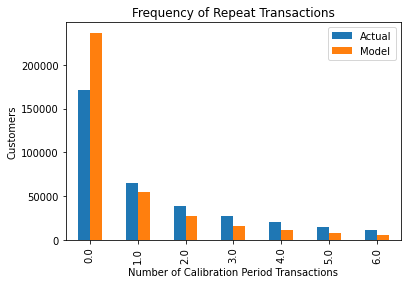

In [0]:
from lifetimes.plotting import plot_period_transactions

_ = plot_period_transactions(bgf) 

In [0]:
# the real number of transactions in the observation period
rfm_cal_holdout["n_transactions_holdout_real"]  = rfm_cal_holdout["frequency_holdout"] 

# the predicted number of transactions in the next 26 weeks (length of the observation period)
rfm_cal_holdout["n_transactions_holdout_pred"] = bgf.predict(t=8.6, 
                                                    frequency=rfm_cal_holdout['frequency_cal'], 
                                                    recency=rfm_cal_holdout['recency_cal'], 
                                                    T=rfm_cal_holdout['T_cal'])

# comparison of the real and predicted transactions
rfm_cal_holdout[["n_transactions_holdout_real", "n_transactions_holdout_pred"]].head(50)

,n_transactions_holdout_real,n_transactions_holdout_pred
CompanyId,,
1000007,1.0,0.507921
1000010,2.0,2.214777
1000011,0.0,0.565526
1000013,1.0,0.908601
1000014,1.0,0.722178
1000015,1.0,0.457326
1000016,1.0,0.908601
1000028,0.0,0.227524
1000034,0.0,0.583692


In [0]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_true = rfm_cal_holdout["n_transactions_holdout_real"],
                          y_pred = rfm_cal_holdout["n_transactions_holdout_pred"],
                          squared = False)
print(RMSE)

0.5584498740118093


Out[13]: <Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

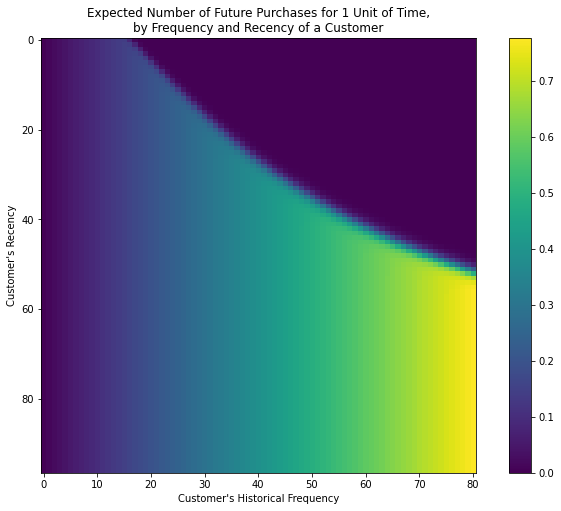

In [0]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf,T=1)

Out[37]: <Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

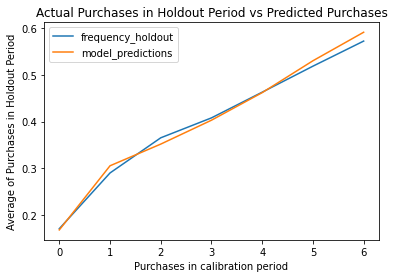

In [0]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(bgf, rfm_cal_holdout)

In [0]:
## Use Gamma-Gamma model to predict customer LTV

# Assumption test
returning_customers_summary = rfm[rfm['frequency']>0]
returning_customers_summary.shape[0]

Out[38]: 250322

In [0]:
returning_customers_summary[['frequency','monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.040104
monetary_value,0.040104,1.000000


In [0]:
# GG model training

from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 1)

returning_customers_summary = returning_customers_summary[returning_customers_summary['monetary_value'] > 0]

ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])


ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
    ).head()

Out[40]: CompanyId
1000007    187.142977
1000010    130.948706
1000011    146.280881
1000013    100.628767
1000014     79.872555
dtype: float64

In [0]:
# Discount Cash Flow Method to calculate CLV

print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    returning_customers_summary['frequency'],
    returning_customers_summary['recency'],
    returning_customers_summary['T'],
    returning_customers_summary['monetary_value'],
    time=2,
    discount_rate=0.051,
    freq='W'
    
).head(10))

CompanyId
1000007     97.265414
1000010    271.472983
1000011     71.657953
1000013     87.075966
1000014     56.329103
1000015     65.991929
1000016     74.088493
1000028    -57.439615
1000034    112.523259
1000035     82.441782
Name: clv, dtype: float64
